## Numpy


---



In [1]:
# import numpy
import numpy as np

### 練習 1：softmax 函數

In [2]:
# 設定總共類別
c = 10
# 模擬輸出 logits
x = np.random.rand(c)
# 計算分子與分母
exp_x = np.exp(x)
sum_exp_x = np.sum(exp_x)
# p_i = softmax(x_i)
p = exp_x/sum_exp_x
# print
print(x)
print(p)

[0.08672365 0.06078067 0.45802163 0.02254111 0.27399089 0.71333912
 0.74823342 0.36598296 0.22846801 0.89239953]
[0.07097528 0.06915765 0.10288683 0.06656302 0.08559261 0.13281367
 0.13752992 0.09383998 0.08178354 0.1588575 ]


### 練習 2：Linear Layer + ReLU *Activation*

In [3]:
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5
#
y = np.dot(W,x)+b
y[y<0] = 0
# print
print(x)
print(y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[ 2.21158815]
 [ 0.        ]
 [ 3.20368136]
 [ 9.96990623]
 [15.26043466]
 [ 4.12687301]
 [10.4247475 ]
 [ 7.04122423]
 [ 0.        ]
 [ 0.        ]
 [ 7.68381351]
 [ 1.8630011 ]
 [ 0.        ]
 [18.6864683 ]
 [ 0.        ]
 [ 0.        ]
 [ 1.34063231]
 [ 8.36739798]
 [ 8.6259632 ]
 [ 0.        ]
 [ 0.66496148]
 [12.33088279]
 [ 3.71359535]
 [ 0.        ]
 [20.54786951]
 [ 0.        ]
 [ 0.        ]
 [ 4.92485375]
 [ 0.        ]
 [ 3.42530445]]


## pandas

---



In [4]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

### 練習 1：數值轉換

In [5]:
# read data
data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)

# 定義map函數
def UVI_trans(UVI: int) -> str:
  if 0<=UVI and UVI<=2 :
    return '低'
  elif 3<=UVI and UVI<=5 :
    return '中'
  elif 6<=UVI and UVI<=7 :
    return '高'
  elif 8<=UVI and UVI<=10 :
    return '甚高'
  else:
    return '極高'

# 轉換
UVI_index = data['UVI Max']
UVI_level = UVI_index.map(UVI_trans)
new_data1 = pd.concat([UVI_index, UVI_level], axis=1)
new_data1.columns = ['日最高紫外線指數', '日最高紫外線強度等級']
new_data1.index = np.arange(1, len(UVI_index)+1)

# print
print(new_data1)
print('低',np.sum(new_data1['日最高紫外線強度等級']=='低'),'次')
print('中',np.sum(new_data1['日最高紫外線強度等級']=='中'),'次')
print('高',np.sum(new_data1['日最高紫外線強度等級']=='高'),'次')
print('甚高',np.sum(new_data1['日最高紫外線強度等級']=='甚高'),'次')
print('極高',np.sum(new_data1['日最高紫外線強度等級']=='極高'),'次')

    日最高紫外線指數 日最高紫外線強度等級
1         11         極高
2          4          中
3         11         極高
4         11         極高
5         14         極高
6         12         極高
7          8         甚高
8         11         極高
9          7          高
10        13         極高
11        10         甚高
12        15         極高
13        14         極高
14        12         極高
15         8         甚高
16        11         極高
17        13         極高
18         7          高
19        14         極高
20        13         極高
21        13         極高
22        14         極高
23        13         極高
24         8         甚高
25        14         極高
26        13         極高
27        13         極高
28        12         極高
29        11         極高
30        13         極高
31        13         極高
低 0 次
中 1 次
高 2 次
甚高 4 次
極高 24 次


### 練習 2：條件篩選

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
# read data
data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)
length = len(data['Precp'])
data['Precp'][data['Precp']=='T']=0

# 定義計算函數
# 降水強度 = 降水量/降水強度
def cal_intensity(row:pd.Series)->float:
  if row['Precp']==0.0:
    return 0.0
  elif row['PrecpHour']==0.0:
    return 0.0
  else:
    return float(row['Precp'])/float(row['PrecpHour'])

# 串接資料
intensity = pd.DataFrame([0.0]*length)
new_data2 = pd.concat([data['Precp'], data['PrecpHour']],axis=1)
intensity = new_data2.apply(cal_intensity, axis=1)

# 計算是否大於平均降水強度
avg = intensity.mean()
is_heavy = pd.DataFrame(intensity>avg)
new_data2 = pd.concat([data['Precp'], data['PrecpHour'], intensity, is_heavy],axis=1)
new_data2.columns = ['降水量','降水時數','降水強度','是否大於平均降水強度']
new_data2.index = np.arange(1, length+1)

#降水強度大於平均降水強度的相關資訊

# print
print(new_data2)

     降水量  降水時數       降水強度  是否大於平均降水強度
1      0   0.5   0.000000       False
2   91.0   3.6  25.277778        True
3      0   0.2   0.000000       False
4    2.0   0.7   2.857143       False
5    1.0   0.8   1.250000       False
6    0.5   0.9   0.555556       False
7   36.5   2.8  13.035714        True
8    0.0   0.0   0.000000       False
9   11.5   1.7   6.764706        True
10  29.0   3.1   9.354839        True
11   2.0   2.6   0.769231       False
12   3.5   2.7   1.296296       False
13   0.0   0.0   0.000000       False
14   0.0   0.0   0.000000       False
15  20.5   2.5   8.200000        True
16  19.0   2.1   9.047619        True
17  28.0   4.3   6.511628        True
18  46.5   3.6  12.916667        True
19   0.0   0.0   0.000000       False
20   0.0   0.0   0.000000       False
21   0.0   0.0   0.000000       False
22   0.0   0.0   0.000000       False
23   0.0   0.0   0.000000       False
24     0   0.8   0.000000       False
25   0.0   0.0   0.000000       False
26   0.0   0

## matplotlib

In [7]:
# import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.patches import Circle, RegularPolygon

### 練習 1：折線圖

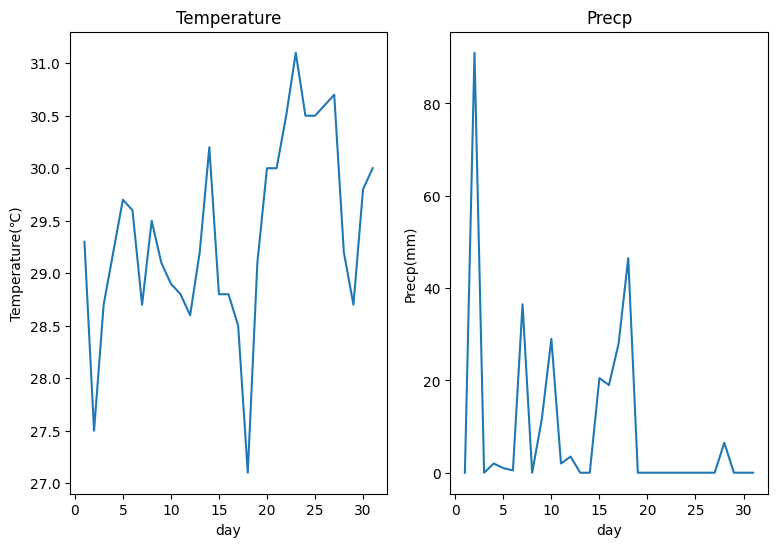

In [8]:
# read data
data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)
Temp = data['Temperature'].to_numpy()
Precp = data['Precp'].to_numpy()
length = len(Temp)
day = np.arange(length)+1

# setting
fig, ax = plt.subplots(1, 2,figsize=(9, 6))
Precp[Precp=='T'] = 0.0

# plot
ax[0].plot(day, Temp)
ax[0].set_title("Temperature")
ax[0].set_xlabel("day")
ax[0].set_ylabel("Temperature(℃)")
ax[1].plot(day, Precp)
ax[1].set_title("Precp")
ax[1].set_xlabel("day")
ax[1].set_ylabel("Precp(mm)")
plt.show()

### 練習 2：雷達圖

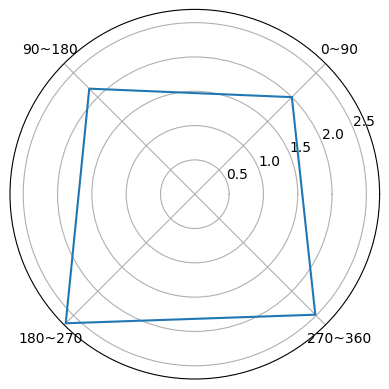

In [9]:
# read data
data = pd.read_csv('./data/467410-2022-08.csv', skiprows=1)
WD = data['WD'].to_numpy() # 風速
WS = data['WS'].to_numpy() # 風速

# 我使用圓形的雷達圖而不是多邊形的雷達圖，因為比較簡單
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.set_thetagrids( range(45,360,90), ('0~90', '90~180', '180~270', '270~360') )
# ax.set_thetagrids( range(45,360,90))
# ax.set_theta_offset(np.pi / 4)

Quad_avg = np.array([0.0]*4)
Quad_avg[0] = WS[np.logical_and(WD>=0,WD<90)].mean() # for 0<=deg<90
Quad_avg[1] = WS[np.logical_and(WD>=90,WD<180)].mean() # for 90<=deg<180
Quad_avg[2] = WS[np.logical_and(WD>=180,WD<270)].mean() # for 180<=deg<270
Quad_avg[3] = WS[np.logical_and(WD>=270,WD<360)].mean() # for 270<=deg<360
# 這一行搞我有夠久，結果問題竟然是出在要用弧度制
WD_point = [np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4] # 風向代表點
# 雷達圖要首尾相接
Quad_avg=np.concatenate((Quad_avg,[Quad_avg[0]]))
WD_point=np.concatenate((WD_point,[WD_point[0]]))

# print
# print(WD_point)
# print(Quad_avg)
ax.plot(WD_point, Quad_avg)
plt.show()

## scikit-learn

In [10]:
# import
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

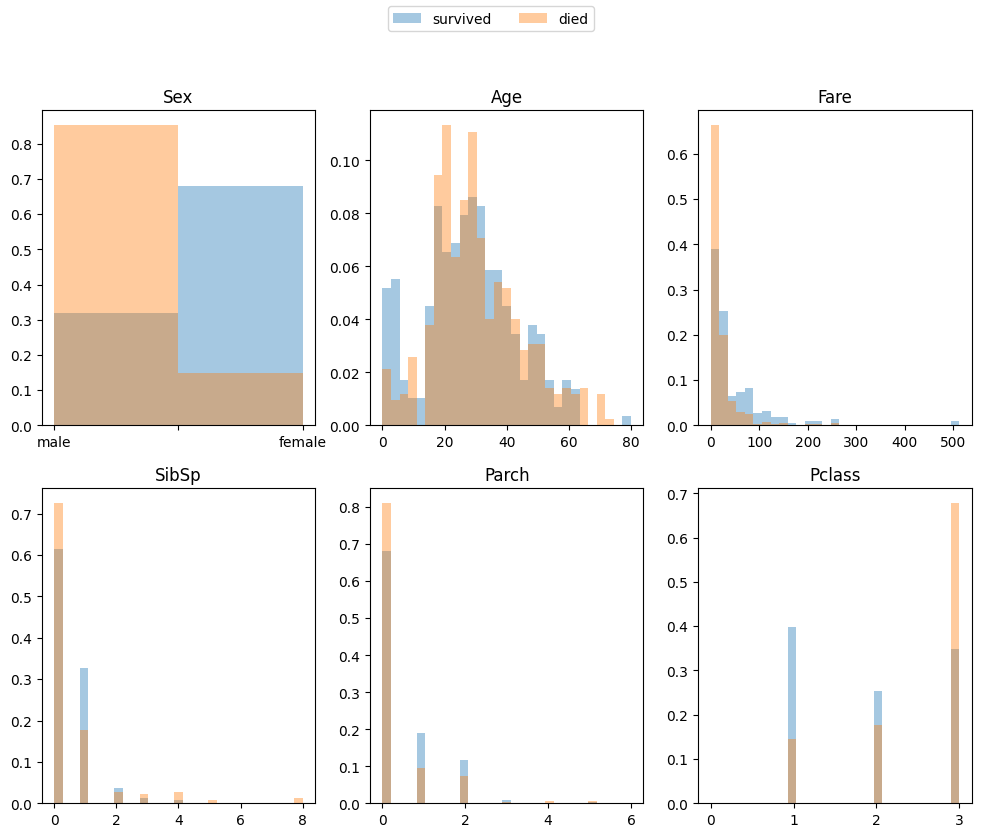

In [11]:
# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 數據分析，這裡之後會刪掉
df = pd.read_csv('./data/train.csv')

# # ============================================
# # 數值型態資料前處理
# # 創造 imputer 並設定填補策略
# print(df['Age'].mean(),df['Age'].median(),df['Age'].mode())
# imputer = SimpleImputer(strategy='median')
# age_iter = df['Age'].to_numpy().reshape(-1, 1)
# # 根據資料學習需要填補的值
# imputer.fit(age_iter)
# # 填補缺失值
# df['Age'] = imputer.transform(age_iter)
# # ============================================


fig, ax = plt.subplots(2, 3, figsize=(12, 9), sharey=False)
# 下面這兩行註釋的語法是我突發奇想的，之前一直沒想到可以這樣寫
# 看來這樣前面很多地方要改了
# survived = df[df['Survived']==1]['Age']
# unsurvived = df[df['Survived']==0]['Age']
survived = df[df['Survived']==1]
died = df[df['Survived']==0]

# Sex
feature = survived['Sex'].to_numpy()
feature[feature=='male'] = 1
feature[feature=='female'] = 0
male_prob = feature.sum()/len(feature)
female_prob = 1-male_prob
# stairs的第二個參數長度要比第一個參數多1，我想它有它的考量
ax[0,0].stairs([male_prob, female_prob], ['male', '', 'female'], fill=True, alpha=0.4)

feature = died['Sex'].to_numpy()
feature[feature=='male'] = 1
feature[feature=='female'] = 0
male_prob = feature.sum()/len(feature)
female_prob = 1-male_prob
# stairs的第二個參數長度要比第一個參數多1，我想它有它的考量
ax[0,0].stairs([male_prob, female_prob], ['male', '', 'female'], fill=True, alpha=0.4)
ax[0,0].set_title('Sex')

# Age, Fare, SibSp, Parch, Pclass
feature_set = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
axes_index = 1
bins_number = 30
for feature in feature_set:
  bins = np.linspace(0,df[feature].max(), bins_number)
  iter = survived[feature].to_numpy()
  iter = iter[~np.isnan(iter)]
  counts, bins = np.histogram(iter, bins=bins)
  counts = counts/counts.sum() # 化成機率分布
  ax[axes_index//3,axes_index%3].stairs(counts, bins, fill=True, alpha=0.4)

  bins = np.linspace(0,df[feature].max(), bins_number)
  iter = died[feature].to_numpy()
  iter = iter[~np.isnan(iter)]
  counts, bins = np.histogram(iter, bins=bins)
  counts = counts/counts.sum() # 化成機率分布
  ax[axes_index//3,axes_index%3].stairs(counts, bins, fill=True, alpha=0.4)
  ax[axes_index//3,axes_index%3].set_title(feature)
  axes_index += 1

fig.legend(labels =['survived','died'], loc='upper center', ncol=2)
plt.savefig('probability.png')
plt.show()

### 練習 1：改善決策樹分類模型

In [12]:
# 練習 Hint

# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Age', 'Fare']]
# 取出訓練資料的答案
df_y = df['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='median')
age = df_x['Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)
# 填補缺失值
df_x['Age'] = imputer.transform(age)

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = DecisionTreeClassifier(random_state=1012)
# 訓練決策樹模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.9831460674157303
test accuracy: 0.7262569832402235


In [35]:
pd.options.mode.chained_assignment = None  # default='warn'
# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入標準化的工具
from sklearn.preprocessing import StandardScaler
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Pclass', 'Fare']]
# 取出訓練資料的答案
df_y = df['Survived']

# # 數值型態資料前處理
# # 創造 imputer 並設定填補策略
# imputer = SimpleImputer(strategy='median')
# age = df_x['Age'].to_numpy().reshape(-1, 1)
# # 根據資料學習需要填補的值
# imputer.fit(age)
# # 填補缺失值
# df_x['Age'] = imputer.transfoarm(age)

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

df_x = df_x.to_numpy()
df_y = df_y.to_numpy()

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# # 標準化
# normalizer = StandardScaler()
# normalizer.fit(train_x)
# train_x = normalizer.transform(train_x)
# test_x = normalizer.transform(test_x)

# 去除離群值 of Fare
low = 0.0
high = 135
index = np.where((train_x[:,2]>=low)&(train_x[:,2]<=high))
train_x = train_x[index] # 濾除離群值
train_y = train_y[index] # 濾除離群值


# 創造決策樹模型
model = DecisionTreeClassifier(
    random_state=1012,
    # criterion='entropy',
    max_depth=6,
    )

# 訓練決策樹模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.8519061583577713
test accuracy: 0.7653631284916201


In [96]:
pd.options.mode.chained_assignment = None  # default='warn'
# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入標準化的工具
from sklearn.preprocessing import StandardScaler
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Pclass', 'Fare']]
# 取出訓練資料的答案
df_y = df['Survived']

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

df_x = df_x.to_numpy()
df_y = df_y.to_numpy()

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 去除離群值 of Fare
low = 0.0
high = 135
index = np.where((train_x[:,2]>=low)&(train_x[:,2]<=high))
train_x = train_x[index] # 濾除離群值
train_y = train_y[index] # 濾除離群值

max_acc = 0.0
best_depth = 0
best_split = 0
best_max_leaf_node = 0
# 創造決策樹模型
model = DecisionTreeClassifier(
    random_state=1012,
    splitter='random',
    max_depth=10,
    min_samples_split=21,
    )

model.fit(train_x, train_y)
pred_train = model.predict(train_x)
train_acc = accuracy_score(train_y, pred_train)
print('train accuracy: {}'.format(train_acc))
pred_test = model.predict(test_x)
test_acc = accuracy_score(test_y, pred_test)
print('test accuracy: {}'.format(test_acc))
# print('----------------------------------')
if test_acc>max_acc:
  max_acc = test_acc

# (best_depth.best_split)=(10,21)
# max_acc= 0.8324022346368715 #1st
# (best_depth.best_split)=(6,4)
# max_acc= 0.8268156424581006 #1st

train accuracy: 0.8328445747800587
test accuracy: 0.8324022346368715


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

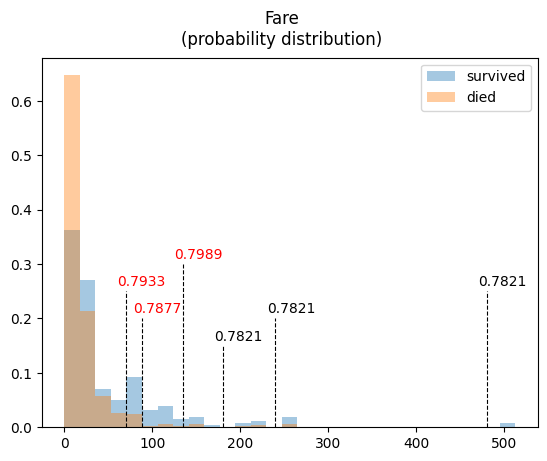

In [19]:
pd.options.mode.chained_assignment = None  # default='warn'
# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入標準化的工具
from sklearn.preprocessing import StandardScaler
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Pclass', 'Fare']]
# 取出訓練資料的答案
df_y = df['Survived']
survived = df[df['Survived']==1]
died = df[df['Survived']==0]

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

# 創造決策樹模型
model = DecisionTreeClassifier(
    random_state=1012,
    # criterion='entropy',
    # max_depth=3,
    )
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

survived = train_x[train_y==1]
died = train_x[train_y==0]

bins_number = 30
bins = np.linspace(0,df['Fare'].max(), bins_number)
iter = survived['Fare'].to_numpy()
iter = iter[~np.isnan(iter)]
counts, bins = np.histogram(iter, bins=bins)
counts = counts/counts.sum() # 化成機率分布
plt.stairs(counts, bins, fill=True, alpha=0.4)

bins = np.linspace(0,df['Fare'].max(), bins_number)
iter = died['Fare'].to_numpy()
iter = iter[~np.isnan(iter)]
counts, bins = np.histogram(iter, bins=bins)
counts = counts/counts.sum() # 化成機率分布
plt.stairs(counts, bins, fill=True, alpha=0.4)
plt.suptitle('Fare\n(probability distribution)')

train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
train_x_copy = train_x.copy()
train_y_copy = train_y.copy()

# 去除離群值
text_height = [0.25, 0.2, 0.3, 0.15 ,0.2, 0.25]
line_cut = [70,88,135,180,240,480]
low = 0
for high in line_cut:
# for high in range(low+10,550,10):
  index = np.where((train_x_copy[:,2]>=low)&(train_x_copy[:,2]<=high))
  train_x = train_x_copy[index] # 濾除離群值
  train_y = train_y_copy[index] # 濾除離群值
  # print('(low,high)=({},{})'.format(low,high))
  # print('length:',np.shape(index)[1])
  if(np.shape(index)[1]==0):
    continue

  model.fit(train_x, train_y)
  pred_train = model.predict(train_x)
  train_acc = accuracy_score(train_y, pred_train)
  # print('train accuracy: {}'.format(train_acc))
  pred_test = model.predict(test_x)
  test_acc = accuracy_score(test_y, pred_test)
  # print('test accuracy: {}'.format(test_acc))
  plt.vlines(x=high,ymin=0,ymax=text_height[line_cut.index(high)],color='black',linestyle='dashed',lw=0.8)
  if test_acc>0.7877:
    plt.text(high-10, text_height[line_cut.index(high)]+0.01, round(test_acc,4), color='red')
  else:
    plt.text(high-10, text_height[line_cut.index(high)]+0.01, round(test_acc,4))
  # print('-------------------------')

plt.legend(labels =['survived','died'], loc='upper right', ncol=1)
plt.savefig('outliner.png')
plt.show()

### 練習 2：使用不同的模型

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'
# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入標準化的工具
from sklearn.preprocessing import StandardScaler
# 匯入模型
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Age', 'Fare', 'SibSp']]
# 取出訓練資料的答案
df_y = df['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='mean')
# imputer = KNNImputer()
age = df_x['Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)
# 填補缺失值
df_x['Age'] = imputer.transform(age)

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

# 去除離群值
# if(type(df_x)==pd.DataFrame):
#   df_x = df_x.to_numpy()
#   df_y = df_y.to_numpy()
# q1, q3 = np.quantile(df_x[:,1], [0.25, 0.75]) # 計算第一與第三四分位數
# low = q1-1.5*(q3-q1) # 計算下界
# high = q3+1.5*(q3-q1) # 計算上界
# index = np.where((df_x[:,1]>=low)&(df_x[:,1]<=high))
# df_x = df_x[index] # 濾除離群值
# df_y = df_y[index]

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 標準化
normalizer = StandardScaler()
normalizer.fit(train_x)
train_x = normalizer.transform(train_x)
test_x = normalizer.transform(test_x)

# 創造模型
# model = GradientBoostingClassifier(
#     n_estimators=20,
#     max_depth=4,
#     )

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    # criterion = "gini",
    # min_samples_leaf = 1,
    # min_samples_split = 10,
    # n_estimators=100,
    # max_features='auto',
    # oob_score=True,
    # random_state=1,
    # n_jobs=-1
    )

# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.8356741573033708
test accuracy: 0.8156424581005587
